In [1]:
library(stringr)

Warning message:
"package 'stringr' was built under R version 3.6.3"


# 네이버 영화 평점 크롤러

In [11]:
# score_list = list()
# text_list= list()

# for(i in 1:2500){
    
    
#     url = paste0('https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=134963&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=', i)
    
#     b = readLines(url, encoding = 'UTF-8')
#     head(b,10)
#     b2 = b[which(str_detect(b, 'star_score'))+2]
    
#     score = as.numeric(str_sub(str_extract(b2, ('(?<=em>).*(</em>)')), end = -6))
    
#     score_list[[i]] = score
#     text = b[which(str_detect(b, "<span id=\"_filtered_ment_"))+4]
                 
#     text2 = gsub("\t", "", text)
#     text2[str_detect(text2, "javascript")] = str_sub(text2[str_detect(text2, 'javascript')])
#     text_list[[i]] = text2
#     cat('\n', i)
    
#     if(i %% 500 ==0){
#         cat('\n save ', i)
#             final_score = unlist(score_list)
#             final_text = unlist(text_list)
        
#             setwd('./')
#             save(final_score, file = 'final_score.RData')
#             save(final_text, file = 'final_text.RData')
#     }
#     }

# score_list
# text_list
final_score = unlist(score_list)
final_text = unlist(text_list)
#final_score
setwd('./')
save(final_score, file = './movie/final_score.RData')
save(final_text, file = './movie/final_score.RData'')

# 크롤링 완료된 파일 불러오기

In [2]:
load('./수업자료/final_text.RData')
load('./수업자료/final_score.RData')
head(final_text)
review <-final_text

[1] "&#39;그래도 우리 잘 해냈지?&#39;라고 말하는 듯한 마지막 눈빛교환이 잊혀지질 않는다 "                                                                                    
[2] "와..그냥 감탄밖엔 안 나온다. 영상미며 음악이며..조폭, 건달, 검사, 신파 좋아하고 실험을 꺼리는 한국의 기성 영화인들 반성해라. 이제 겨우 두 편 만든 신인감독이 이 정도다 "
[3] "처음 들을때는 몰랐다 이 음악이 슬퍼질거란걸 "                                                                                                                           
[4] "꿈과 사랑, 우리는 항상 성공인지 실패인지 평가만 해왔다. 하지만 라라랜드는 말해준다. &#34;봐! 꿈과 사랑, 그 흔들리는 파도가 얼마나 아름다운지&#34; "                     
[5] "마지막 회상신에서 처음과 달리 키스신으로 스토리시작될때 진짜 소리지를뻔... "                                                                                            
[6] "내일 죽으면 오늘 보러 갈만한 영화 "

In [3]:
comments<-gsub("<.*?>","",review)
comments<-gsub("\t","",comments)
comments<-gsub("[][!#$%*,:;<=>@_`|‘~{}&★☆ㅋㅎ《》◈△▲▽▼○●◎◇◆□◁◀▷▶♤♠♡♥♧♣◉◈▣■◐◑♨☏☎☜☞↖↘♭♩♪♬㈜ⓒ]", " ",comments)
comments<-gsub("rdquo|gt|lt|nbsp|amp|quot|apos","",comments)
comments<-gsub("  "," ",comments)
comments<-gsub("\\^"," ",comments)
comments<-gsub("ㅠ|ㅜ|ㅡ|ㅎ"," ",comments)
comments<-gsub("\"|\n|+","",comments)
comments<-gsub("\\+","",comments)
comments<-gsub("/|!|\\*|\\+|\\@"," ",comments)
comments<-gsub("'","",comments)
comments<-gsub("\"","",comments)
comments<-gsub("\"","",comments)
comments<-gsub("=","",comments)
comments<-gsub("~|;|<|>","",comments)
comments<-gsub("\\?","",comments)
comments<-gsub("\\[.*?\\]","",comments)
comments<-gsub("\\(.*?\\)","",comments)
comments<-gsub("\\(|\\)"," ",comments)
comments<-gsub("\\]|\\[|\\(|\\)|:|-|\\,|\\."," ",comments)
comments<-gsub("\\!","",comments)
comments<-gsub("\"\"","",comments)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [4]:
library(stringr)
co = str_split(comments, ' ')
head(co)

[[1]]
 [1] ""           "3"          "그래도"     "우리"       "잘"        
 [6] "해냈지"     "3"          "라고"       "말하는"     "듯한"      
[11] "마지막"     "눈빛교환이" "잊혀지질"   "않는다"     ""          

[[2]]
 [1] "와"         ""           "그냥"       "감탄밖엔"   "안"        
 [6] "나온다"     ""           "영상미며"   "음악이며"   ""          
[11] "조폭"       "건달"       "검사"       "신파"       "좋아하고"  
[16] "실험을"     "꺼리는"     "한국의"     "기성"       "영화인들"  
[21] "반성해라"   ""           "이제"       "겨우"       "두"        
[26] "편"         "만든"       "신인감독이" "이"         "정도다"    
[31] ""          

[[3]]
[1] "처음"         "들을때는"     "몰랐다"       "이"           "음악이"      
[6] "슬퍼질거란걸" ""            

[[4]]
 [1] "꿈과"       "사랑"       "우리는"     "항상"       "성공인지"  
 [6] "실패인지"   "평가만"     "해왔다"     ""           "하지만"    
[11] "라라랜드는" "말해준다"   ""           ""           "34"        
[16] "봐"         "꿈과"       "사랑"       "그"         "흔들리는"  
[21] "파도가"     "얼마나"     "아름다운지" "34"         ""          

[[5]]
 [1] "마지막"         "회상신에서"     "처음과"         "달리"          
 [5] "키스신으로"     "스토리시작될때" "진짜"           "소리지를뻔"    
 [9] ""               ""               ""               ""              

[[6]]
[1] "내일"   "죽으면" "오늘"   "보러"   "갈만한" "영화"   ""

In [5]:
co2 = table(unlist(co))
length(co2)

[1] 44495

In [6]:
wo = names(sort(co2, decreasing = T)[2:301])
wo = wo[!str_detect(wo, '\\d')]
head(wo)

[1] "영화"   "너무"   "정말"   "마지막" "여운이" "음악"

In [7]:
i = 1

mat = matrix(0, ncol = length(wo), nrow = length(co))
head(mat)

0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,영화,너무,정말,마지막,여운이,음악,아름다운,꿈을,최고의,더,...,저는,꿈이,나도,느낌이,만드는,연기도,영화에,대해,좋아서,좋았던
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


score2
   1    2    3    4    5    6    7    8    9   10 
1372  532  321  350  306  457  789 2087 3144 9850 

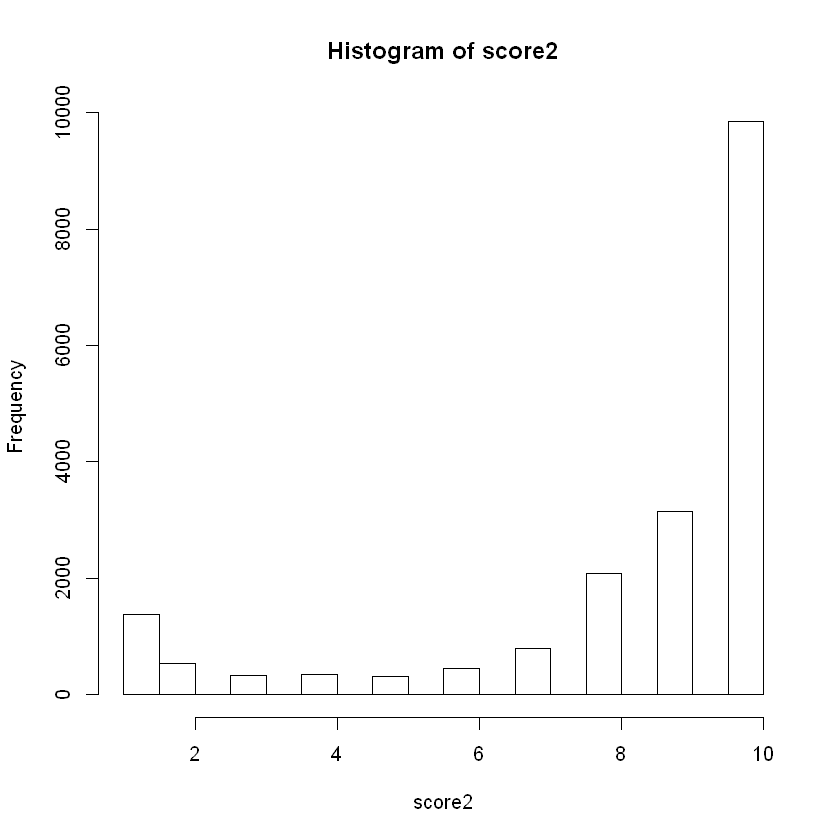

In [8]:
for(i in 1:length(co)){
    mat[i, wo %in% co [[i]]] = 1
#     cat( '\n', i )
}
colnames(mat) = wo
mat = data.frame(mat)
head(mat)
mat2 = mat[apply(mat,1,sum) >0,]

score2 = final_score[apply(mat,1,sum) >0]

table(score2)
hist(score2)

In [12]:
score3 <- ifelse(score2 > 5,1,0)

dim(mat2)
length(score3)

sam <- sample(1:nrow(mat2),nrow(mat2)*0.7)
train <- mat2[sam,]
valid <- mat2[-sam,]
tr_y <- score3[sam]
valid_y <- score3[-sam]


library(glmnet)

pr1 <- 0
pr2 <- 0


[1] 19208   298

[1] 19208

Loading required package: Matrix

Loading required package: foreach

Loaded glmnet 2.0-16




In [15]:
install.packages('glmnet')

Installing package into 'C:/Users/admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'glmnet' is in use and will not be installed"


In [16]:
library(glmnet)